In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [62]:
def SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0+I0+R0
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1]
            dR_dt = gamma * I[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
    
    return S, I, R, T

In [63]:
# SIR(S0,I0,R0, beta, gamma, t_max, stepsize):

N = 1000
R_naught = beta/gamma

def final_size(r):
    final = r - (1 - np.exp(-R_naught * r))
    return final

r_infinity = fsolve(final_size, x0=1)
conversion_to_final = r_infinity*N #necessary conversion, multiply r_infinity by N in order to see it alike the SIR model

S,I,R,T = SIR(999,1,0,1,0.5,50,0.05) #for this problem beta = 1, gamma = 0.5


(0.0, 52.5)

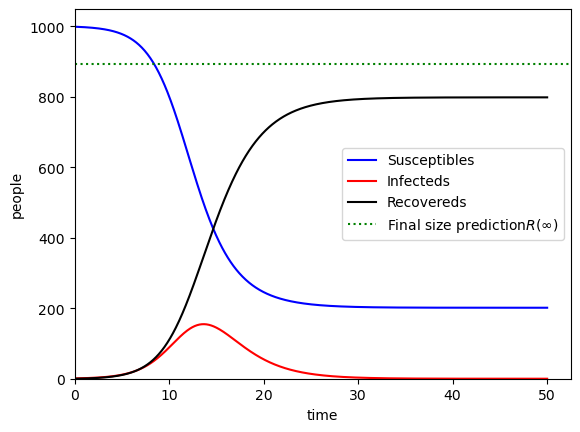

In [64]:
fig, ax = plt.subplots()
ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infecteds')
ax.plot(T,R, color='k', label='Recovereds')

#add green line atheight of r_infinity
ax.axhline(y = conversion_to_final, linestyle=':', color='green', label='Final size prediction$R(\infty)$')


ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)


In [82]:
N = 1000000
epsilon = 1 / N
beta = 0.5
gamma = 0.2
R_naught = beta / gamma
S_threshold = N / R_naught
t_max = 50
stepsize = 0.5
I0 = epsilon

def stable(S0, I0, R0, beta, gamma, t_max, stepsize):
    S0_stable = int(0.75 * S_threshold)  # below threshold
    S_stable, I_stable, R_stable, T_stable = SIR(S0_stable, I0, R0, beta, gamma, t_max, stepsize)
    return S_stable, I_stable, R_stable, T_stable


def unstable(S0, I0, R0, beta, gamma, t_max, stepsize):
    S0_unstable = int(1.5 * S_threshold)  # above threshold
    S_un, I_un, R_un, T_un = SIR(S0_unstable, I0, R0, beta, gamma, t_max, stepsize)
    return S_un, I_un, R_un, T_un

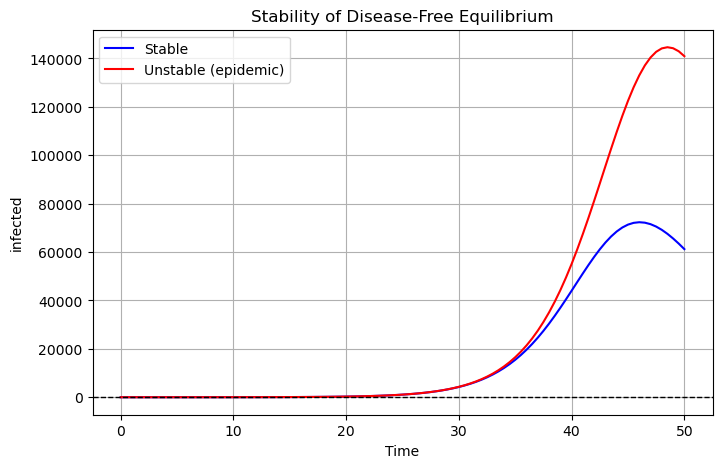

In [84]:
  # Plot

S_s, I_s, R_s, T_s = stable(S0=N-1, I0=1, R0=0, beta=beta, gamma=gamma, t_max=t_max, stepsize=stepsize)
S_u, I_u, R_u, T_u = unstable(S0=N-1, I0=1, R0=0, beta=beta, gamma=gamma, t_max=t_max, stepsize=stepsize)

plt.figure(figsize=(8,5))
plt.plot(T_s, I_s, 'b', label='Stable')        # use T_s and I_s
plt.plot(T_u, I_u, 'r', label='Unstable (epidemic)')     # use T_u and I_u
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)  # disease-free line
plt.xlabel('Time')
plt.ylabel('infected')
plt.title('Stability of Disease-Free Equilibrium')
plt.legend()
plt.grid(True)
plt.show()